# Welcome to the First Walkthrough Notebook in the MyLLM Repo

In this first walkthrough notebook, we’ll kickstart the journey of building a Language Model from scratch by preparing and exploring our dataset. This notebook is part of the **MyLLM** project, where we aim to develop a robust language model step by step.

In this session, we'll focus on:
- Loading and exploring the **Kendrick Lamar lyrics** dataset.
- Preprocessing the text data to ensure it’s ready for training.
- Loading a **pretrained GPT model** to get a sense of the baseline performance we're targeting.
- Building an efficient **dataloader** to smoothly handle large batches during training.

Let’s dive in and start building our model from the ground up!




# Installing Required Packages

Before we dive into the code, let’s make sure we have all the necessary packages installed. We’ll need several libraries to handle dataset loading, text tokenization, and model inference.

In this notebook, we'll be using:

- `datasets` from Hugging Face: to load the Kendrick Lamar lyrics dataset.
- `transformers`: for working with pretrained GPT models.
- `torch`: to handle tensor computations and build our dataloader.

Let’s start by installing them if they’re not already available.


In [2]:

# Install the necessary libraries
# !pip install datasets transformers torch torchvision

- Loading and exploring the **Kendrick Lamar lyrics** dataset.


In [3]:
from datasets import load_dataset, DatasetDict , Dataset

datasets = load_dataset("huggingartists/kendrick-lamar")


Using the latest cached version of the dataset since huggingartists/kendrick-lamar couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\user\.cache\huggingface\datasets\huggingartists___kendrick-lamar\default\1.0.0\6dcd1e0ee0e03b21a9ae9c8863ebb16e1f102886 (last modified on Wed Apr  3 17:55:00 2024).


In [4]:
# Additionally, we can use the Hugging Face API to split the dataset into training, validation, and test sets.
# However, I prefer working with the whole dataset for more effective training.

import numpy as np

# Define the percentages for splitting the dataset
train_percentage = 0.9        # 90% of the data will be used for training
validation_percentage = 0.07   # 7% of the data will be used for validation
test_percentage = 0.03         # 3% of the data will be used for testing

# Split the 'train' data into train, validation, and test sets
# We use numpy's split function to create the splits based on the defined percentages
train, validation, test = np.split(
    datasets['train']['text'], 
    [
        int(len(datasets['train']['text']) * train_percentage), 
        int(len(datasets['train']['text']) * (train_percentage + validation_percentage))
    ]
)

# Create a DatasetDict to store the splits
datasets = DatasetDict(
    {
        'train': Dataset.from_dict({'text': list(train)}),            # Convert train data to Dataset format
        'validation': Dataset.from_dict({'text': list(validation)}),  # Convert validation data to Dataset format
        'test': Dataset.from_dict({'text': list(test)})               # Convert test data to Dataset format
    }
)

# Print the shapes of the resulting splits for verification
print(train.shape)       # Output the shape of the training set
print(validation.shape)  # Output the shape of the validation set
print(test.shape)       # Output the shape of the test set


(774,)
(61,)
(26,)


In [5]:
# for fun lets just load a pretrained model and run infrence to see if it works
from transformers import pipeline
generator = pipeline('text-generation',
                     model='huggingartists/kendrick-lamar')
generator("I am", num_return_sequences=5)

# if this genrate a bug maybe you need to "pip install tf-keras"


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': 'I am a king\nSippin with that golden syrup\nMama said Im tryna get a ride\nBitch tell me that Im gettin rich off this\nBitch tell me that Im gettin rich off this\nI feel like its a new day for the new nigga\nTook my bitch to my first show\nThen came back a few weeks later\nAnd I got a million different niggas, and I dont need to keep them ones\nAint no need to know where I got money at\nI aint tryna lose it, I just might get a piece\nIn the streets where I be tryna make it out\nI got a million different niggas, and I dont need to keep them ones\nAint no need to know where I got money at\nI got a million different niggas, and I dont need to keep them ones\nAint no need to know where I got money at\nGot a million different n'},
 {'generated_text': 'I am a true believer but Im a slave of a different type of mind, and when I write you a poem, what I do, is, what do you expect?\nWorse than that, I feel like I could use that time to change my mind\nAnd put some shit down

The first few lines of the dataset:

Entry 1: Nobody pray for me
It been that day for me
Way 
Ayy, I remember syrup sandwiches and crime allowances
Finesse a nigga with some counterfeits, but now Im countin’ this
Parmesan where my accountant lives, in fact Im downin this
D’USSÉ with my boo bae tastes like Kool-Aid for the analysts
Girl, I can buy your ass the world with my paystub
Ooh, that pussy good, wont you sit it on my taste bloods?
I get way too petty once you let me do the extras
Pull up on your block, then break it down: we playin Tetris
AM to the PM, PM to the AM, funk
Piss out your per diem, you just gotta hate em, funk
If I quit your BM, I still ride Mercedes, funk
If I quit this season, I still be the greatest, funk
My left stroke just went viral
Right stroke put lil baby in a spiral
Soprano C, we like to keep it on a high note
Its levels to it, you and I know
Bitch, be humble 
Sit down 
Be humble 
Sit down 
Be humble 
Bitch, sit down 
Be humble 
Sit down 
Be humble 
Sit do

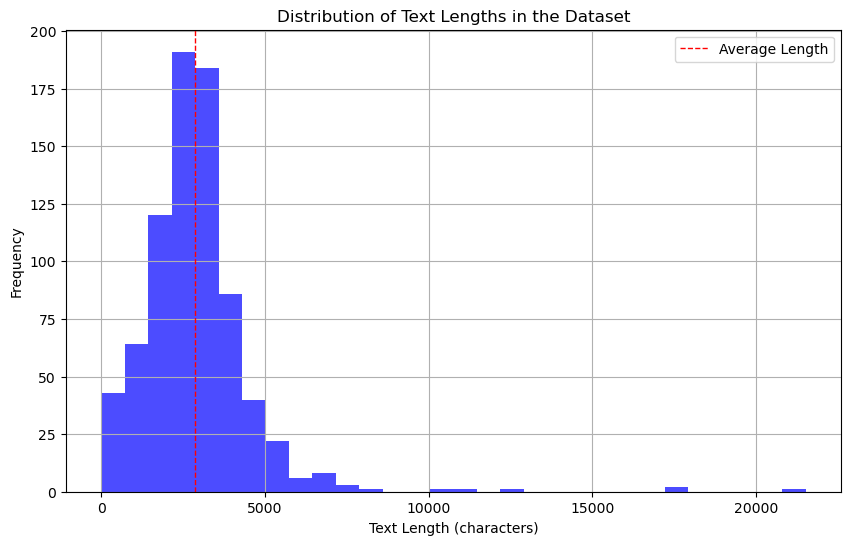

In [6]:
# Let's perform some Exploratory Data Analysis (EDA) on our dataset

# First, we'll print the first few lines of the dataset to get a sense of the lyrical content
print("The first few lines of the dataset:\n")

# Display the first 3 entries
for i in range(3):

    print(f"Entry {i+1}: {datasets['train']['text'][i]}")

# Calculate the total number of entries in the dataset
total_entries = len(datasets['train'])
print(f"Total number of entries in the dataset: {total_entries}\n")

# Analyze the distribution of text lengths in the dataset
text_lengths = [len(text) for text in datasets['train']['text']]

# Display basic statistics about text lengths
print("Distribution of text lengths:")
print(f" - Minimum length: {min(text_lengths)} characters")
print(f" - Maximum length: {max(text_lengths)} characters")
print(f" - Average length: {np.mean(text_lengths):.2f} characters")
print(f" - Standard deviation of lengths: {np.std(text_lengths):.2f} characters\n")

# Optional: Visualizing the distribution of text lengths
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=30, alpha=0.7, color='blue')
plt.title("Distribution of Text Lengths in the Dataset")
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.grid()
plt.axvline(np.mean(text_lengths), color='red', linestyle='dashed', linewidth=1, label='Average Length')
plt.legend()
plt.show()


# Designing a Simple Tokenizer

Designing a simple tokenizer is a crucial step in preparing your text data for training a language model. Tokenization involves breaking down the text into smaller units, or tokens, that can be processed by the model. While there are many efficient tokenization libraries available, like **Tiktoken**, it's essential to understand the underlying functionality of tokenization to appreciate how these tools work and to make informed choices when selecting or designing a tokenizer.

## Building a Simple Tokenizer

Here’s a step-by-step guide to creating a simple tokenizer using Python:

### 1. Define Tokenizer Class:
- Create a class that handles both tokenization and detokenization.
- This tokenizer will use a basic approach to split text into words and maintain a vocabulary.

### 2. Tokenization Process:
- **Convert Text into Tokens:** Break the text into smaller units, typically words, but you may also consider subword units for more complex models.
- **Create a Mapping:** Develop a mapping from tokens to their corresponding indices (vocabulary). This is crucial for converting text into a numerical format that can be fed into machine learning models.

### 3. Detokenization Process:
- **Convert Indices Back into Words:** Implement a mechanism to reconstruct the original text from the indices using the inverse mapping. This is important for interpreting model outputs and debugging.



In [7]:
# lets peform some text preprocessing to be add later to the tokinizer function class

import re  # Importing the regular expressions module for text processing

# Sample text containing words, spaces, and punctuation
sample_text = "hello my name is is Mohammed , and Im a deep learning engineer"

# Split the sample text by whitespace while retaining the whitespace as separate elements
output1 = re.split(r'(\s)', sample_text)

# Split the sample text by spaces and punctuation (commas and periods), retaining the delimiters
output2 = re.split(r'([,.]|\s)', sample_text)

# Remove any empty strings from the output list. This is done to clean up the results.
output3 = [item for item in output2 if item.strip()]        

# Print the outputs to see the results of each split operation
print("Output 1 (split by whitespace):")
print(output1)  # Displays the text split into words with whitespace included
print("\nOutput 2 (split by spaces and punctuation):")
print(output2)  # Displays the text split into words and includes punctuation as separate elements
print("\nOutput 3 (cleaned output):")
print(output3)  # Displays the cleaned list without empty strings


Output 1 (split by whitespace):
['hello', ' ', 'my', ' ', 'name', ' ', 'is', ' ', 'is', ' ', 'Mohammed', ' ', ',', ' ', 'and', ' ', 'Im', ' ', 'a', ' ', 'deep', ' ', 'learning', ' ', 'engineer']

Output 2 (split by spaces and punctuation):
['hello', ' ', 'my', ' ', 'name', ' ', 'is', ' ', 'is', ' ', 'Mohammed', ' ', '', ',', '', ' ', 'and', ' ', 'Im', ' ', 'a', ' ', 'deep', ' ', 'learning', ' ', 'engineer']

Output 3 (cleaned output):
['hello', 'my', 'name', 'is', 'is', 'Mohammed', ',', 'and', 'Im', 'a', 'deep', 'learning', 'engineer']


In [8]:
# Text Preprocessing with Regular Expressions
# In this example, we will preprocess a sample text string using Python's re module.
# We will split the text into meaningful tokens, including punctuation and words, and then clean the result.

import re  # Import the regular expressions module for text processing

# Sample text containing words, spaces, and various punctuation marks
sample_text2 = "Hi ! , my name is Mohammed , do you like som tea ? ---- or no?"

# Split the sample text by specific punctuation marks and whitespace
# The regex pattern includes various punctuation characters and handles the double hyphen (--)
preprcessed_text = re.split(r'([,.:;!_?"()\']|--|\s)', sample_text2)

# Remove any empty strings from the output list to clean up the results
preprcessed_text = [item for item in preprcessed_text if item.strip()]

# Print the preprocessed text to see the tokens generated
print(preprcessed_text)  # Displays the list of tokens from the sample text

# Get the number of tokens generated after preprocessing
num_tokens = len(preprcessed_text)
print(f"Number of tokens: {num_tokens}")  # Displays the total count of tokens


['Hi', '!', ',', 'my', 'name', 'is', 'Mohammed', ',', 'do', 'you', 'like', 'som', 'tea', '?', '--', '--', 'or', 'no', '?']
Number of tokens: 19


In [9]:
#now lets apply this to the whole dataset

def preprcessed_text(text):

    # Sample text containing words, spaces, and various punctuation marks
    sample_text2 = text

    # Split the sample text by specific punctuation marks and whitespace     
    preprcessed_text = re.split(r'([,.:;!_?"()\']|--|\s)', sample_text2)

    # Remove any empty strings from the output list to clean up the results
    preprcessed_text = [item for item in preprcessed_text if item.strip()]

    return preprcessed_text

preprcessed_dataset = {
    'train': [preprcessed_text(text) for text in datasets['train']['text']]
}



In [10]:
# First, we extract unique tokens from the preprocessed dataset's first training entry.
# This will help us build a vocabulary that can be used for tokenization.
all_words = sorted(set(preprcessed_dataset['train'][0]))

# Calculate the vocabulary size, which is the number of unique tokens we found.
vocab_size  = len(all_words)

# Print the vocabulary size to understand how many unique tokens we will work with.
print(vocab_size)  # Fixed typo: 'ptint' changed to 'print'

# Create a vocabulary dictionary where each token is mapped to a unique integer.
# This mapping is essential for converting text into a format that can be processed by the model.
vocab = {token: integer for integer, token in enumerate(all_words)}

# Iterate through the vocabulary to display each token and its corresponding index.
for i, item in enumerate(all_words):
    print(item)  # Print each token from the vocabulary


203
,
.
1
2K
:
?
AC
AM
Ayy
BM
Be
Bitch
C
D’USSÉ
Evian
Finesse
Get
Girl
Grey
I
If
Im
It
Its
Kool-Aid
Man-Man
Mercedes
My
Nobody
Obama
Ooh
PM
Parmesan
Photoshop
Piss
Polo
Poupon
Pryor
Pull
Richard
Right
Sandman
Show
Sit
Soprano
Still
TED
Talk
Tetris
This
Watch
Way
Who
a
accountant
afro
after
aint
alcohol
all
allowances
amaze
analysts
and
ass
ayy
baby
bae
be
been
blew
block
bloods
boo
bout
break
but
buy
can
cool
couch
counterfeits
countin’
crazy
crime
day
dick
diem
do
dont
down
downin
elaborate
em
extras
fabricate
fact
fakin
for
from
frontin
fuck
fuckin
fucking
funk
get
good
gotta
greatest
hate
he
high
humble
in
it
just
keep
kill
know
left
let
levels
life
like
lil
lives
make
mamas
marks
me
meds
modest
most
my
natural
nigga
not
note
now
of
off
on
once
out
paged
paystub
per
petty
play
playin
pray
pussy
put
quit
realest
remember
ride
right
sandwiches
season
she
shit
sick
sit
so
socks
some
somethin
soul
speak
spiral
stage
stay
still
stretch
stroke
syrup
take
talk
taste
tastes
that
the
then
th

In [11]:
import re

class TokenizerV1:
    def __init__(self, dataset):
        # Initialize the Tokenizer with a dataset
        
        # Preprocess the dataset text once and store it for future use
        self.preprocessed_dataset = [
            self.preprocessed_text(text) for text in dataset['train']['text']
        ]
        
        # Create a sorted set of all unique tokens from the preprocessed dataset
        self.all_words = sorted(set(
            token for tokens in self.preprocessed_dataset for token in tokens
        ))
        
        # Create a vocabulary mapping tokens to unique integer indices
        self.vocab = {token: integer for integer, token in enumerate(self.all_words)}
        
        # Create a reverse mapping from integer indices back to tokens
        self.int_to_str = {integer: token for token, integer in self.vocab.items()}

    def preprocessed_text(self, text):
        """
        Preprocesses the input text by splitting it into tokens based on 
        specified punctuation marks and whitespace.
        
        Args:
            text (str): The input text to preprocess.
        
        Returns:
            List[str]: A list of preprocessed tokens.
        """
        # Split the sample text by specific punctuation marks and whitespace
        preprocessed_text = re.split(r'([,.:;!_?"()\']|--|\s)', text)
        
        # Remove any empty strings from the output list to clean up the results
        preprocessed_text = [item for item in preprocessed_text if item.strip()]
        return preprocessed_text

    def encode(self, text):
        """
        Encodes the input text into a sequence of integer IDs based on the vocabulary.
        
        Args:
            text (str): The input text to encode.
        
        Returns:
            List[int]: A list of integer IDs corresponding to the tokens in the input text.
        """
        # Preprocess the text into tokens
        preprocessed_tokens = self.preprocessed_text(text)
        
        # Debugging output to display the preprocessed tokens
        print("Preprocessed Tokens:", preprocessed_tokens)  
        
        # Map each token to its corresponding integer ID
        ids = [self.vocab[token] for token in preprocessed_tokens if token in self.vocab]
        
        return ids

    def decode(self, ids):
        """
        Decodes a sequence of integer IDs back into human-readable text.
        
        Args:
            ids (List[int]): A list of integer IDs to decode.
        
        Returns:
            str: The reconstructed text from the list of integer IDs.
        """
        # Join the integer IDs back to their corresponding tokens
        text = " ".join([self.int_to_str[i] for i in ids if i in self.int_to_str])
        
        # Clean up the reconstructed text by removing extra spaces before punctuation
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        
        return text


In [12]:
# Initialize the tokenizer with the dataset
tok = TokenizerV1(datasets)
text = """It's the last he painted, you know," 
           Mrs. Gisburn said with pardonable pride."""
ids = tok.encode(text)  # Encode the input text to token IDs
print("Encoded IDs:", ids)  # Should print the encoded IDs
print("Decoded Text:", tok.decode(ids))  # Decode the IDs back to text

Preprocessed Tokens: ['It', "'", 's', 'the', 'last', 'he', 'painted', ',', 'you', 'know', ',', '"', 'Mrs', '.', 'Gisburn', 'said', 'with', 'pardonable', 'pride', '.']
Encoded IDs: [4249, 21257, 23631, 17033, 15594, 19105, 33, 25469, 16917, 33, 5494, 48, 21296, 25208, 20019, 48]
Decoded Text: It s the last he painted, you know, Mrs. said with pride.


One small thing but important. The <UNK> token is used to represent unknown words in the text.
so with that in mind lets update the TokenizerV1 class to TokenizerV2 to handle this probelm 

In [13]:
class TokenizerV2:
    def __init__(self, dataset):
        # Initialize the Tokenizer with a dataset
        
        # Preprocess the dataset text once and store it for future use
        self.preprocessed_dataset = [
            self.preprocessed_text(text) for text in dataset['train']['text']
        ]
        
        # Create a sorted set of all unique tokens from the preprocessed dataset
        self.all_words = sorted(set(
            token for tokens in self.preprocessed_dataset for token in tokens
        ))
        
        # Add a special <UNK> token for unknown words
        self.all_words.append('<UNK>')
        
        # Create a vocabulary mapping tokens to unique integer indices
        self.vocab = {token: integer for integer, token in enumerate(self.all_words)}
        
        # Create a reverse mapping from integer indices back to tokens
        self.int_to_str = {integer: token for token, integer in self.vocab.items()}
        
        # Save the ID for the <UNK> token
        self.unk_token_id = self.vocab['<UNK>']

    def preprocessed_text(self, text):
        """
        Preprocesses the input text by splitting it into tokens based on 
        specified punctuation marks and whitespace.
        
        Args:
            text (str): The input text to preprocess.
        
        Returns:
            List[str]: A list of preprocessed tokens.
        """
        # Split the sample text by specific punctuation marks and whitespace
        preprocessed_text = re.split(r'([,.:;!_?"()\']|--|\s)', text)
        
        # Remove any empty strings from the output list to clean up the results
        preprocessed_text = [item for item in preprocessed_text if item.strip()]
        return preprocessed_text

    def encode(self, text):
        """
        Encodes the input text into a sequence of integer IDs based on the vocabulary.
        
        Args:
            text (str): The input text to encode.
        
        Returns:
            List[int]: A list of integer IDs corresponding to the tokens in the input text.
        """
        # Preprocess the text into tokens
        preprocessed_tokens = self.preprocessed_text(text)
        
        # Debugging output to display the preprocessed tokens
        print("Preprocessed Tokens:", preprocessed_tokens)
        
        # Map each token to its corresponding integer ID, or to <UNK> if the token is not found
        ids = [self.vocab.get(token, self.unk_token_id) for token in preprocessed_tokens]
        
        return ids

    def decode(self, ids):
        """
        Decodes a sequence of integer IDs back into human-readable text.
        
        Args:
            ids (List[int]): A list of integer IDs to decode.
        
        Returns:
            str: The reconstructed text from the list of integer IDs.
        """
        # Join the integer IDs back to their corresponding tokens
        text = " ".join([self.int_to_str[i] for i in ids if i in self.int_to_str])
        
        # Clean up the reconstructed text by removing extra spaces before punctuation
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        
        return text

# Example usage
dataset = {
    'train': {
        'text': [
            "Hello, world! How are you?",
            "This is a test sentence.",
            "Tokenizer test!"
        ]
    }
}

# Initialize TokenizerV2
tok = TokenizerV2(dataset)

# Example text with unknown words
text = """Hello, unknown_token! This should map to <UNK>."""
ids = tok.encode(text)
print("Encoded IDs:", ids)
print("Decoded Text:", tok.decode(ids))


Preprocessed Tokens: ['Hello', ',', 'unknown', '_', 'token', '!', 'This', 'should', 'map', 'to', '<UNK>', '.']
Encoded IDs: [4, 1, 15, 15, 15, 0, 6, 15, 15, 15, 15, 2]
Decoded Text: Hello, <UNK> <UNK> <UNK>! This <UNK> <UNK> <UNK> <UNK>.


## From Building a Tokenizer to Using `tiktoken` for Efficiency

We had some fun implementing a simple tokenizer from scratch, which gave us valuable insights into the fundamental workings of tokenization—splitting text into tokens, mapping tokens to integers, and even handling unknown tokens. This hands-on approach was a great learning exercise to understand what happens under the hood when text is processed for NLP tasks.

However, in real-world applications, especially with large-scale models like GPT, **efficiency is crucial**. We need a tokenizer that not only handles the complexities of natural language but does so at high speed and with minimal memory overhead. That's where the **`tiktoken`** library comes in.

`tiktoken` is a highly optimized and efficient library, specifically designed for tokenizing text for large transformer models like GPT-3 and GPT-4. It uses **Byte-Pair Encoding (BPE)** to compress text, reducing the number of tokens while maintaining meaning. By leveraging `tiktoken`, we get a robust solution that can handle all edge cases—from special characters and emojis to multilingual text—while ensuring compatibility with cutting-edge language models.

Now that we understand the foundational ideas behind tokenization, it's time to implement a more efficient solution using `tiktoken`. This will give us the speed and scalability we need for real-world NLP applications, without compromising on our deeper understanding of how tokenization works.


In [14]:
#! pip install tiktoken

In [15]:
import tiktoken

# Example text for tokenization
sample_text = "I got, I got, I got loyalty, got royalty inside my DNA."

# Initialize a tokenizer. For example, we'll use GPT-3 tokenizer (you can change depending on your model)
tokenizer = tiktoken.get_encoding("gpt2")

# Encode the sample text into tokens
tokens = tokenizer.encode(sample_text)

# Decode tokens back to the original text
decoded_text = tokenizer.decode(tokens)

# Display the results
print("Original Text:", sample_text)
print("Tokens:", tokens)
print("Decoded Text:", decoded_text)


Original Text: I got, I got, I got loyalty, got royalty inside my DNA.
Tokens: [40, 1392, 11, 314, 1392, 11, 314, 1392, 15843, 11, 1392, 29359, 2641, 616, 7446, 13]
Decoded Text: I got, I got, I got loyalty, got royalty inside my DNA.


In [16]:
import os 
from keras.preprocessing.sequence import pad_sequences

# Define the data directory where tokenized data will be saved
data_dir = "data"
os.makedirs(data_dir, exist_ok=True)  # Create the data directory if it doesn't exist

# Load your tokenizer (using GPT-2 as an example; change as needed)
# This tokenizer is used to convert text into token IDs
tokenizer = tiktoken.encoding_for_model("gpt2")  # Change to your specific model if needed

def tokenize_texts(texts):
    """Tokenize a list of texts using the tiktoken library.
    
    Args:
        texts (list of str): List of texts to be tokenized.

    Returns:
        list of list of int: Each inner list contains token IDs for the corresponding text.
    """
    return [tokenizer.encode(text) for text in texts]  # Encode each text into token IDs

# Tokenize each split using the tiktoken library
train_ids = tokenize_texts(datasets['train']['text'])  # Tokenize training texts
val_ids = tokenize_texts(datasets['validation']['text'])  # Tokenize validation texts
test_ids = tokenize_texts(datasets['test']['text'])  # Tokenize test texts

# Pad sequences to the maximum length (e.g., max length of 128)
max_length = 128  # Define the maximum length for padding
# Pad the tokenized sequences to ensure uniform length for model input
train_ids = pad_sequences(train_ids, maxlen=max_length, padding='post', truncating='post')
val_ids = pad_sequences(val_ids, maxlen=max_length, padding='post', truncating='post')
test_ids = pad_sequences(test_ids, maxlen=max_length, padding='post', truncating='post')

# Convert the padded sequences to NumPy arrays of type int32
# This allows for efficient storage and manipulation
train_ids = np.array(train_ids, dtype=np.int32)
val_ids = np.array(val_ids, dtype=np.int32)
test_ids = np.array(test_ids, dtype=np.int32)

# Save the tokenized data to binary files for later use
train_ids.tofile(os.path.join(data_dir, "train_ids.bin"))  # Save training IDs
val_ids.tofile(os.path.join(data_dir, "val_ids.bin"))      # Save validation IDs
test_ids.tofile(os.path.join(data_dir, "test_ids.bin"))    # Save test IDs

# Print the shapes of the resulting splits for verification
print("Data stored in:", data_dir)  # Confirm the data directory
print(f"Train IDs shape: {train_ids.shape}")  # Print shape of training IDs
print(f"Validation IDs shape: {val_ids.shape}")  # Print shape of validation IDs
print(f"Test IDs shape: {test_ids.shape}")  # Print shape of test IDs


Data stored in: data
Train IDs shape: (774, 128)
Validation IDs shape: (61, 128)
Test IDs shape: (26, 128)


Now that the data is preprocessed, tokenized, and saved, it's time to move on to the final — and arguably the most important — part of this notebook:

# **THE DATA LOADER**

This is where all the magic happens! The data loader will efficiently feed batches of text to our model, ensuring seamless training and unlocking the full potential of our language model. Let's dive into it!


### Efficient Data Loading for LLM Training: Sliding Window Algorithm

In language model training, especially for text generation, the **sliding window** algorithm is essential. It generates input-output pairs that help the model predict the next token in a sequence, crucial for text generation tasks.

#### Importance of the Sliding Window
- It extracts fixed-length input sequences (windows) from data.
- It predicts the next token that follows each window.

This process allows the model to:
1. Learn relationships between tokens within a context.
2. Maximize training data by creating multiple input-output pairs from one text sequence.

---

### Sliding Window Concept

Given a sequence, the sliding window moves across it, extracting fixed-sized chunks (e.g., 4 tokens) as inputs, and uses the token that follows the window as the target. 

#### Example Process:
- **Inputs**: Sequences of tokens (e.g., `[1, 2, 3, 4]`).
- **Target**: The next token in the sequence (e.g., `5`).
  
For each window, the model learns to predict the following token, allowing it to generate text based on context.

---

### Why It Matters for Text Generation in LLMs
- The model learns to predict the next token by observing overlapping sequences of text.
- By training on these input-output pairs, the model can generate coherent text during inference.

Understanding this sliding window mechanism is key to preparing data efficiently for training large language models.


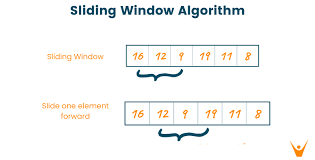        

In [46]:
# To create an efficient data loader for LLM training, we need to understand the sliding window algorithm.
# This is crucial for text generation tasks, where the model learns to predict the next token in a sequence.
# The sliding window extracts a fixed-size input window and the next token (target) for model training.

# Mock data simulating a sequence (could be a sequence of token IDs in actual text data)
mock_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Define the size of the sliding window (number of tokens/values the model will use as input)
window_size = 4

# Initialize lists to store input windows and their corresponding target values
inputs = []
targets = []

# Loop over the data to create sliding windows and targets
# The loop will stop before the last few elements to ensure there is always a "next" token to predict
for i in range(len(mock_data) - window_size):
    # Input window: a sequence of 'window_size' tokens/values
    input_window = mock_data[i:i + window_size]
    
    # Target: the token that immediately follows the input window (i.e., the next token)
    target_value = mock_data[i + window_size]
    
    # Append the input window and its corresponding target to the respective lists
    inputs.append(input_window)
    targets.append(target_value)

# Print each input window and its corresponding target to visualize the sliding window process
for i in range(len(inputs)):
    print(f"Input {i + 1}: {inputs[i]} => Target: {targets[i]}")

# Print out the total number of inputs and their shapes (for inspection)
print(f"\nTotal inputs: {len(inputs)}, Input shape: {len(inputs[0])}")
# Print out the total number of targets (should match the number of inputs)
print(f"Total targets: {len(targets)}")


Input 1: [1 2 3 4] => Target: 5
Input 2: [2 3 4 5] => Target: 6
Input 3: [3 4 5 6] => Target: 7
Input 4: [4 5 6 7] => Target: 8
Input 5: [5 6 7 8] => Target: 9
Input 6: [6 7 8 9] => Target: 10

Total inputs: 6, Input shape: 4
Total targets: 6


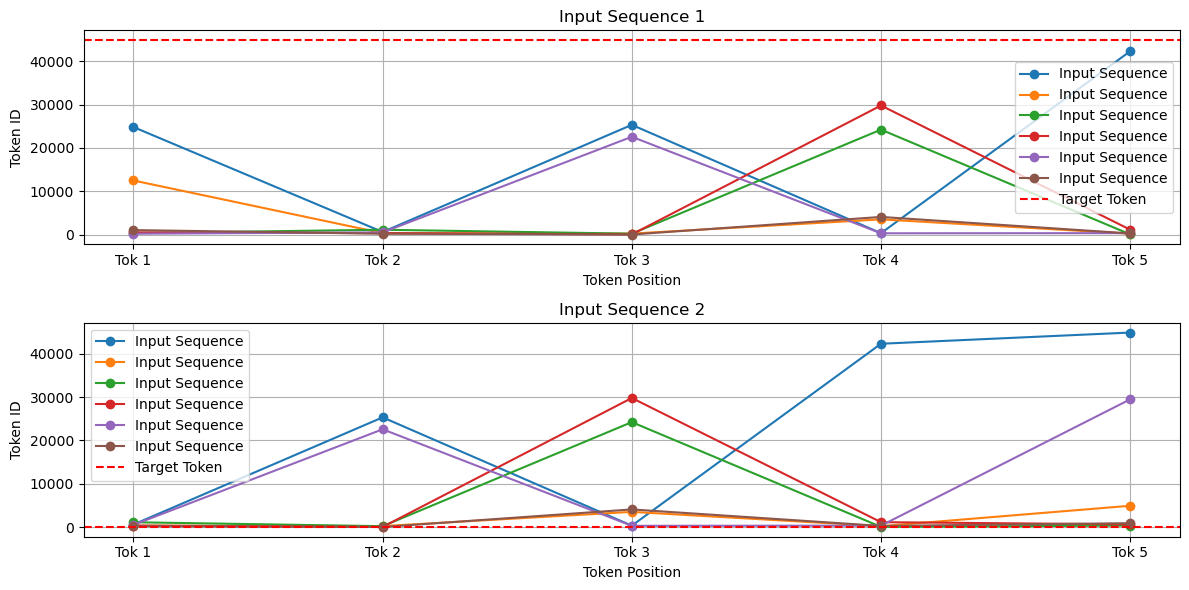

Inputs shape: (2, 5, 6)
Targets shape: (2, 6)


In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Example tokenized data (replace this with your actual tokenized sequences)
# Each sublist represents a sequence of token IDs from your text data.
tokenized_data = np.array([
    [24795, 12472, 329, 502, 198, 1026],
    [587, 326, 1110, 329, 502, 198],
    [25309, 220, 198, 32, 22556, 11],
    [314, 3505, 24208, 29777, 290, 4065],
    [42290, 198, 37, 1127, 325, 257],
    [44873, 4908, 351, 617, 29465, 896],
    [11, 475, 783, 1846, 954, 259],
])

# Define the sliding window size, i.e., the number of tokens to consider as input
window_size = 5

# Initialize lists to store input-output pairs for training
inputs = []
targets = []

# Create input-output pairs using the sliding window algorithm
# For each position in the data, the algorithm extracts 'window_size' tokens as input
# and the next token sequence as the target output.
for i in range(len(tokenized_data) - window_size):
    inputs.append(tokenized_data[i:i + window_size])  # Input is a window of sequences
    targets.append(tokenized_data[i + window_size])   # Target is the next sequence

# Convert the lists of inputs and targets to numpy arrays for easier manipulation
inputs = np.array(inputs)
targets = np.array(targets)

# Visualization of the input-output relationships
plt.figure(figsize=(12, 6))

# Loop over each input-target pair to create subplots
# Each plot shows the input sequence and the corresponding first token from the target
for i in range(len(inputs)):
    plt.subplot(len(inputs), 1, i + 1)
    
    # Plot the input sequence tokens with markers
    plt.plot(inputs[i], marker='o', label='Input Sequence')
    
    # Visualize the first token of the target sequence as a red dashed line
    plt.axhline(y=targets[i][0], color='r', linestyle='--', label='Target Token')
    
    # Title and labels for each subplot
    plt.title(f'Input Sequence {i + 1}')
    plt.xlabel('Token Position')
    plt.ylabel('Token ID')
    
    # Set token positions on the x-axis
    plt.xticks(range(window_size), [f'Tok {j + 1}' for j in range(window_size)])
    
    # Add legend and grid to make the plot clearer
    plt.legend()
    plt.grid(True)

# Automatically adjust subplot layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# Print the shapes of the resulting input and target arrays for inspection
print(f"Inputs shape: {inputs.shape}")  # Shape will be (n_samples, window_size, token_length)
print(f"Targets shape: {targets.shape}")  # Shape will be (n_samples, token_length)


```markdown
# PyTorch DataLoader and Dataset Overview

In PyTorch, the `Dataset` and `DataLoader` classes are essential for managing and feeding data to models during training. 

## Custom Dataset

The `Dataset` class defines how to access your data. It requires three main methods:
- **`__init__`**: Initializes the dataset, typically storing the data and labels.
- **`__len__`**: Returns the total number of samples.
- **`__getitem__`**: Retrieves a single sample (data and label) by index.

Example:
```python
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]
```

## DataLoader

The `DataLoader` class loads data in batches, handles shuffling, and allows parallel data loading for efficiency. 

Example:
```python
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)
```

Key features:
- **Batching**: Groups data into batches for efficient processing.
- **Shuffling**: Randomizes data order for better model generalization.
- **Parallel Loading**: Speeds up data fetching using multiple workers.

### Using DataLoader
```python
for batch_data, batch_labels in dataloader:
    # Process batch
    pass
```

In summary, `Dataset` defines how data is accessed, and `DataLoader` efficiently loads and batches that data for model training.
```

In [48]:
import torch
import numpy as np
from torch.utils.data import DataLoader, Dataset

class GPT2Dataset(Dataset):
    def __init__(self, file_path, max_length, stride):
        """
        Initializes the dataset by reading the binary data from the given file and setting up parameters.
        
        Args:
            file_path (str): Path to the .bin file containing tokenized data.
            max_length (int): The size of the input window (sequence length).
            stride (int): The step size for sliding the window.
        """
        # Load the binary file as a NumPy array
        self.data = np.fromfile(file_path, dtype=np.int32)
        self.max_length = max_length
        self.stride = stride

    def __len__(self):
        """
        Returns the total number of samples in the dataset.
        """
        return (len(self.data) - self.max_length) // self.stride

    def __getitem__(self, idx):
        """
        Retrieves a single input-output pair by index.

        Args:
            idx (int): Index of the data.

        Returns:
            input_seq (torch.Tensor): Input sequence of length max_length.
            output_seq (torch.Tensor): Output sequence (next tokens), shifted by one.
        """
        # Calculate the start index based on the stride
        start_idx = idx * self.stride
        input_seq = self.data[start_idx: start_idx + self.max_length]
        output_seq = self.data[start_idx + 1: start_idx + self.max_length + 1]
        
        # Convert input/output to PyTorch tensors
        input_seq = torch.tensor(input_seq, dtype=torch.long)
        output_seq = torch.tensor(output_seq, dtype=torch.long)
        
        return input_seq, output_seq


In [50]:
# Define the path to the training file in the data subdirectory
train_file = 'data/train_ids.bin'

# Define parameters for the dataset
max_length = 512  # Sequence length
stride = 128      # Step size between windows

# Create the dataset and DataLoader
train_dataset = GPT2Dataset(file_path=train_file, max_length=max_length, stride=stride)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, drop_last=True)


# Example of iterating over the DataLoader
for batch_inputs, batch_outputs in train_loader:
    print(f"Inputs: {batch_inputs.shape}, Outputs: {batch_outputs.shape}")


Inputs: torch.Size([32, 512]), Outputs: torch.Size([32, 512])
Inputs: torch.Size([32, 512]), Outputs: torch.Size([32, 512])
Inputs: torch.Size([32, 512]), Outputs: torch.Size([32, 512])
Inputs: torch.Size([32, 512]), Outputs: torch.Size([32, 512])
Inputs: torch.Size([32, 512]), Outputs: torch.Size([32, 512])
Inputs: torch.Size([32, 512]), Outputs: torch.Size([32, 512])
Inputs: torch.Size([32, 512]), Outputs: torch.Size([32, 512])
Inputs: torch.Size([32, 512]), Outputs: torch.Size([32, 512])
Inputs: torch.Size([32, 512]), Outputs: torch.Size([32, 512])
Inputs: torch.Size([32, 512]), Outputs: torch.Size([32, 512])
Inputs: torch.Size([32, 512]), Outputs: torch.Size([32, 512])
Inputs: torch.Size([32, 512]), Outputs: torch.Size([32, 512])
Inputs: torch.Size([32, 512]), Outputs: torch.Size([32, 512])
Inputs: torch.Size([32, 512]), Outputs: torch.Size([32, 512])
Inputs: torch.Size([32, 512]), Outputs: torch.Size([32, 512])
Inputs: torch.Size([32, 512]), Outputs: torch.Size([32, 512])
Inputs: 